In [1]:
import cv2
import os
import copy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
image_dir = './data/Images'
test_path = './data/Test.csv'
train_path = './data/Train.csv'

df = pd.read_csv(train_path)
df.head()

,Image_ID,Target
0,ID_0073qfb8,0
1,ID_00gy3vH2,1
2,ID_00uB3UFr,0
3,ID_012xZpNw,1
4,ID_014GgMRb,1


In [3]:
def show_random():
    fig, axs = plt.subplots(2, 3, figsize=(15,8))

    for ax in axs.ravel():
        filename, label = df.sample().values[0] 
        img = cv2.imread(f'{image_dir}/{filename}.tif', cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img) 
        ax.set_title(label)
        
    plt.show()

ID_Sx3Jf3V7
ID_YSRUDJRY
ID_NXRzOg9A
ID_BHAubtdo
ID_YSRUDJRY
ID_3A6YUNAb


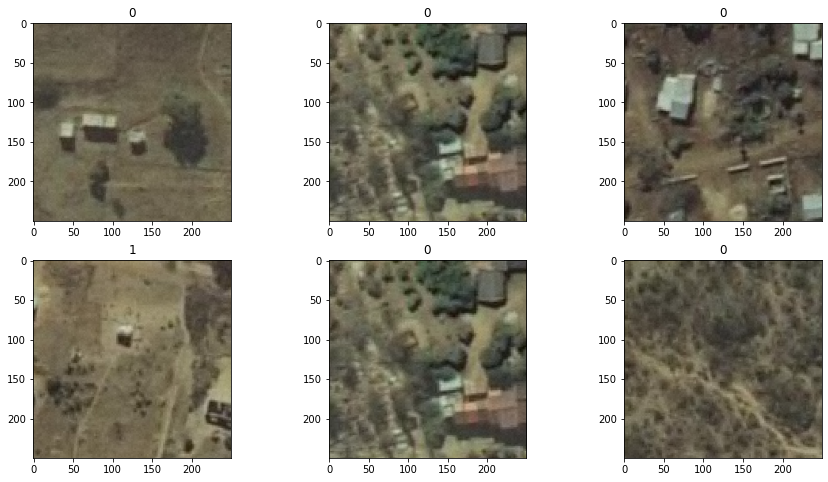

In [4]:
show_random()

In [26]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

def get_train_transform():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])

def get_valid_transform():
    return A.Compose([
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

In [35]:
# https://albumentations.ai/docs/examples/pytorch_classification/
    
def visualize_augmentations(dataset, samples=9, cols=3):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        idx = random.randint(0, len(dataset))
        image, label = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
        ax.ravel()[i].set_title(label)
    plt.tight_layout()
    plt.show()

In [36]:
from dataset import RoadSegment

road_dataset = RoadSegment(df, image_dir, get_train_transform())

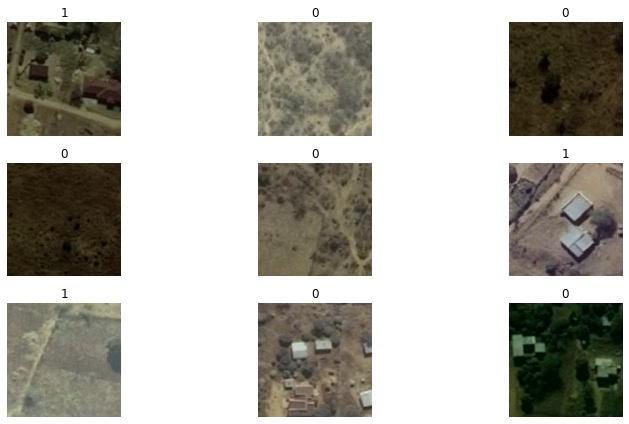

In [37]:
random.seed(42)
visualize_augmentations(road_dataset)